In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("cep1_dataset.xlsx")

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [6]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

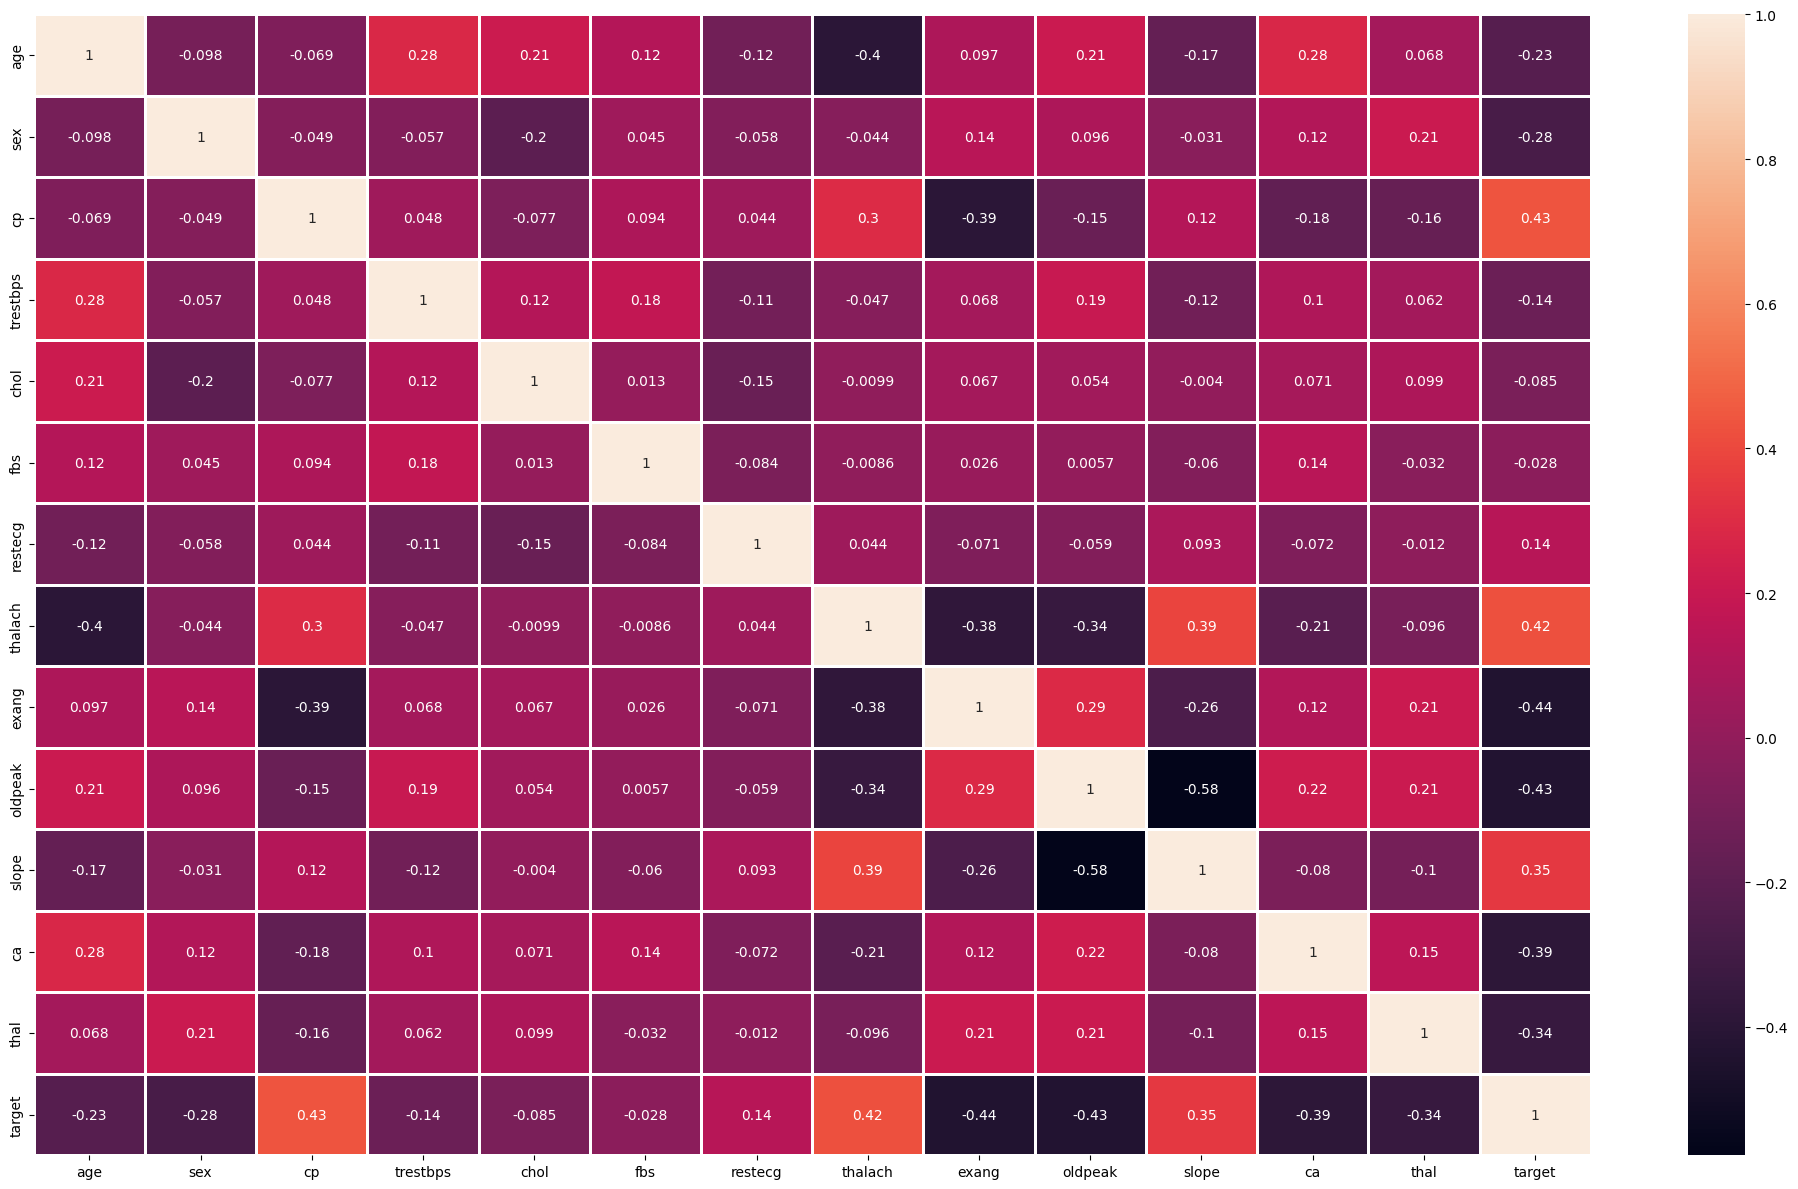

In [9]:
df_corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(df_corr,linewidth = 1,annot = True,xticklabels = df_corr.columns,yticklabels = df_corr.columns)
plt.tight_layout()

In [10]:
df_continuous = df[["age","trestbps","chol","thalach","oldpeak"]]
df_continuous

age  trestbps  chol  thalach  oldpeak
0     63       145   233      150      2.3
1     37       130   250      187      3.5
2     41       130   204      172      1.4
3     56       120   236      178      0.8
4     57       120   354      163      0.6
..   ...       ...   ...      ...      ...
298   57       140   241      123      0.2
299   45       110   264      132      1.2
300   68       144   193      141      3.4
301   57       130   131      115      1.2
302   57       130   236      174      0.0

[303 rows x 5 columns]

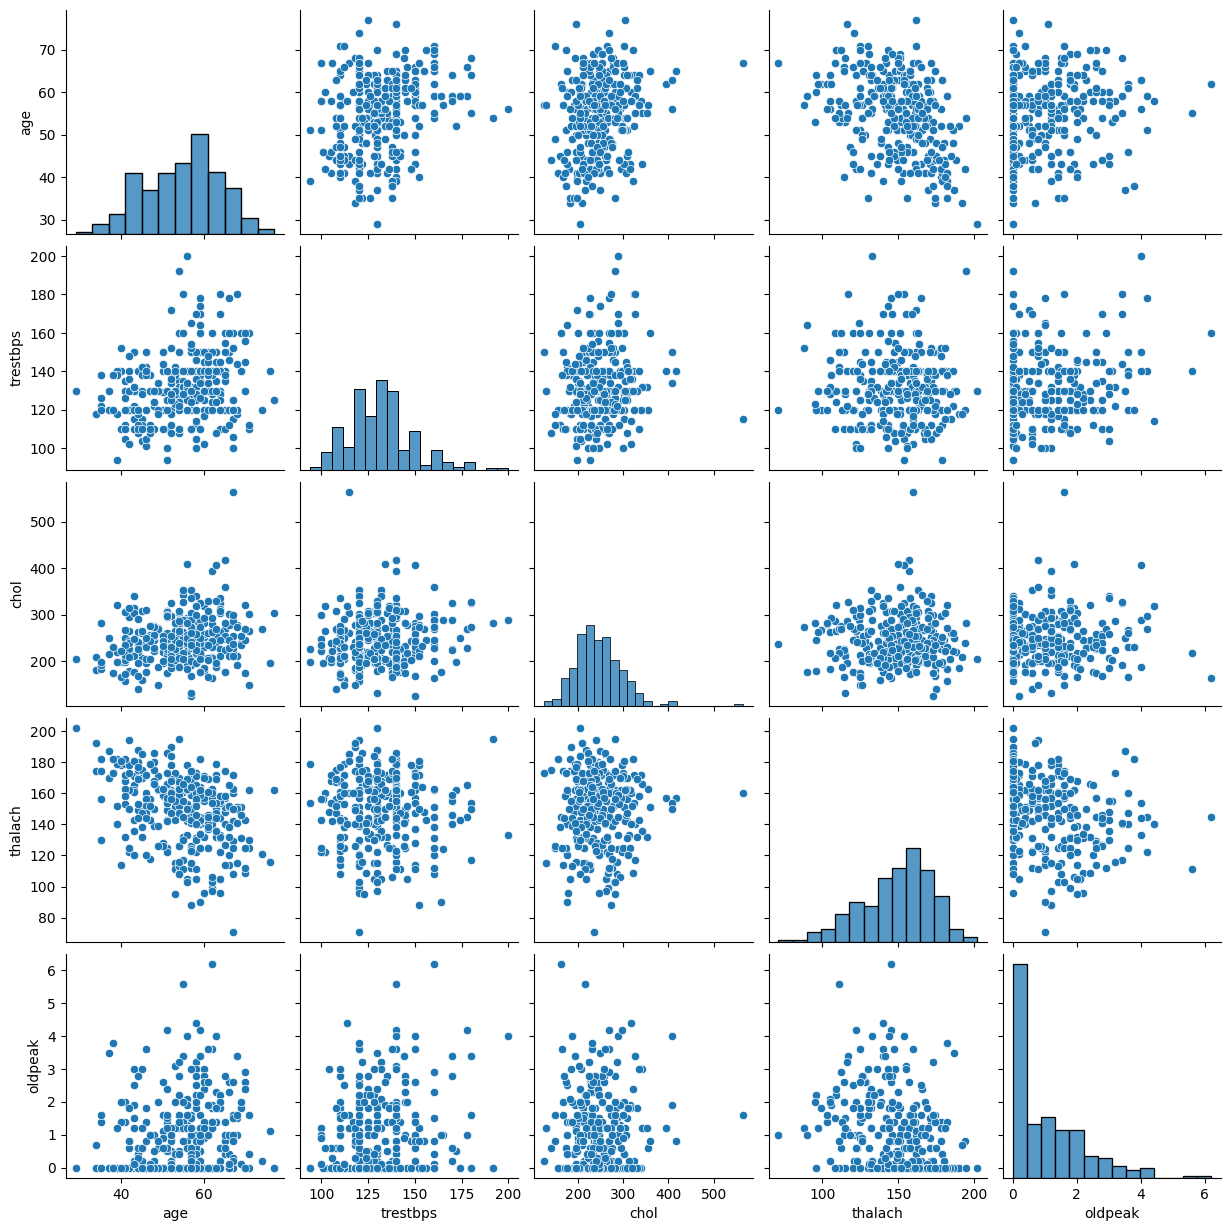

In [11]:
sns.pairplot(df_continuous)

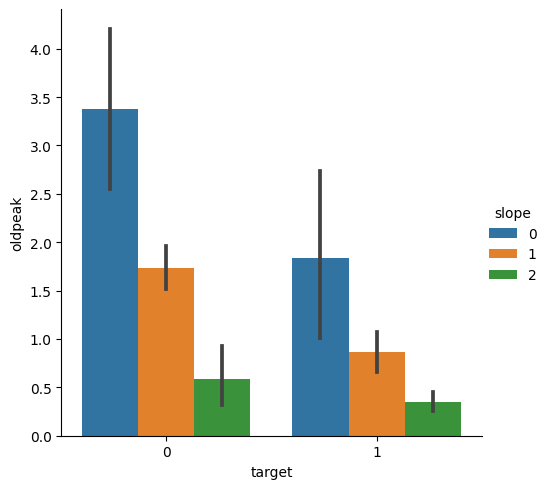

In [12]:
sns.catplot(data = df,x="target",y="oldpeak",hue="slope",kind="bar")

<AxesSubplot: xlabel='target', ylabel='oldpeak'>

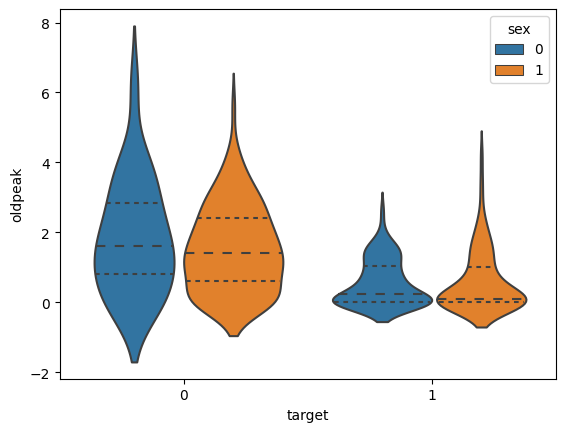

In [13]:
sns.violinplot(x = "target",y="oldpeak",hue="sex",inner="quartile",data=df)

<AxesSubplot: xlabel='target', ylabel='thalach'>

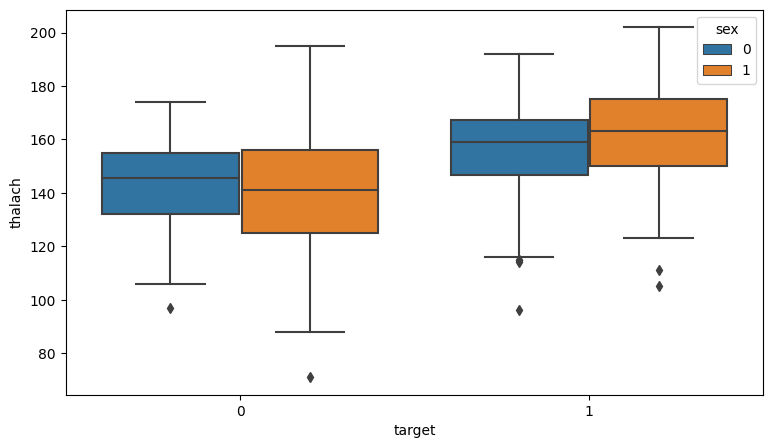

In [14]:
plt.figure(figsize=(9,5))
sns.boxplot(x = "target",y = "thalach",hue = "sex",data=df)

In [15]:
p_data = df[df["target"]==1]
p_data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
160   56    1   1       120   240    0        1      169      0      0.0   
161   55    0   1       132   342    0        1      166      0      1.2   
162   41    1   1       120   157    0        1      182      0      0.0   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
160      0   0     2       1  
161      2   0     2       1  
162      2   0     2       1  
163      2   4     2       1  
164      2   4     2       1  

[165 rows x 14 columns]

In [16]:
n_data = df[df["target"]==0]
n_data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
167   62    0   0       140   268    0        0      160      0      3.6   
168   63    1   0       130   254    0        0      147      0      1.4   
169   53    1   0       140   203    1        0      155      1      3.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
165      1   3     2       0  
166      1   2     3       0  
167      0   2     2       0  
168      1   1     3       0  
169      0   0     3       0  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[138 rows x 14 columns]

In [17]:
print("positive patients depression: {}".format(p_data["oldpeak"].mean()))
print("neagative patients depression: {}".format(n_data["oldpeak"].mean()))

positive patients depression: 0.583030303030303
neagative patients depression: 1.5855072463768116


In [18]:
print("positive patients Maximum heart rate : {}".format(p_data["thalach"].mean()))
print("neagative patients Maximum heart rate : {}".format(n_data["thalach"].mean()))

positive patients Maximum heart rate : 158.46666666666667
neagative patients Maximum heart rate : 139.1014492753623


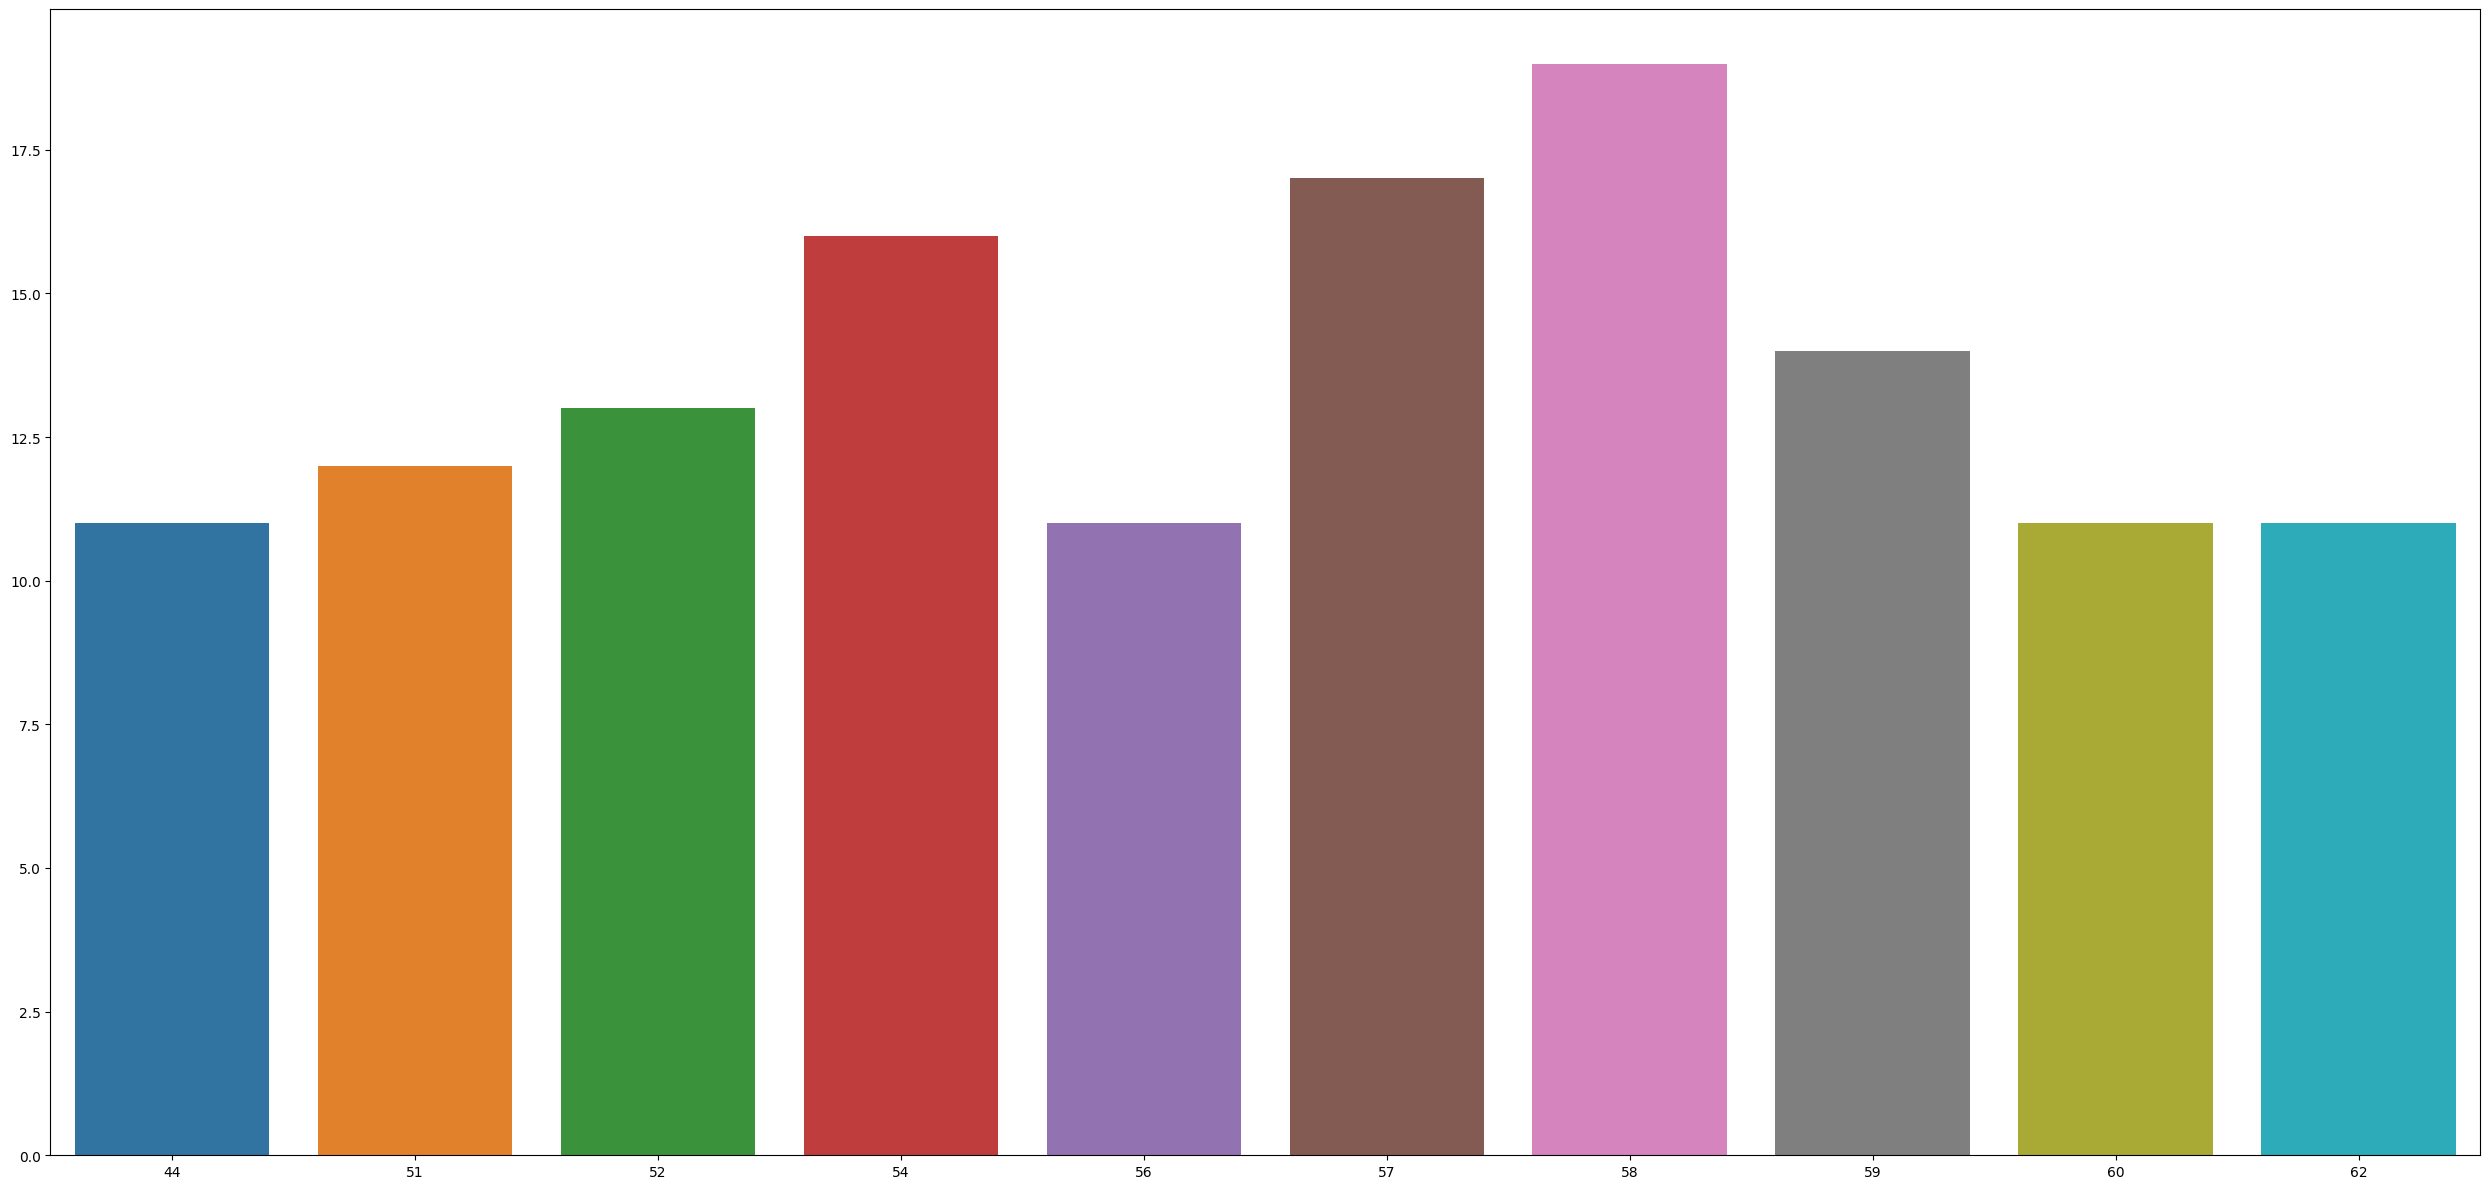

In [19]:
plt.figure(figsize=(25,12))
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.tight_layout()

## Splitting the data

In [20]:
X = df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## LogisticRegression 

In [22]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [23]:
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [24]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test,y_pred)*100))

[[20 10]
 [ 5 26]]
Accuracy Scaore is : 75.41


## KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
y_pred2 = knn.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [27]:
print(confusion_matrix(y_test,y_pred2))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test,y_pred2)*100))

[[21  9]
 [ 6 25]]
Accuracy Scaore is : 75.41


## SUPPORT VECTOR MACHINE SVC

In [28]:
svc = SVC(random_state=1)
svc.fit(X_train,y_train)

SVC(random_state=1)

In [29]:
y_pred3 = svc.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [30]:
print(confusion_matrix(y_test,y_pred3))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test,y_pred3)*100))

[[20 10]
 [ 4 27]]
Accuracy Scaore is : 77.05


## GaussianNB

In [31]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [32]:
y_pred4 = gnb.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [33]:
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test,y_pred4)*100))

[[22  8]
 [ 4 27]]
Accuracy Scaore is : 80.33


## DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [35]:
y_pred5 = dt.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [36]:
print(confusion_matrix(y_test,y_pred5))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test,y_pred5)*100))

[[20 10]
 [ 9 22]]
Accuracy Scaore is : 68.85


## RandomForestClassifier

In [37]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [38]:
y_pred6 = rf.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [39]:
print(confusion_matrix(y_test,y_pred6))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test,y_pred6)*100))

[[21  9]
 [ 3 28]]
Accuracy Scaore is : 80.33


## XGBClassifier

In [40]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [41]:
y_pred7 = xgb.predict(X_test)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [42]:
print(confusion_matrix(y_test,y_pred7))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test,y_pred7)*100))

[[22  8]
 [ 4 27]]
Accuracy Scaore is : 80.33


In [44]:
rf.feature_importances_

array([0.07813526, 0.04206087, 0.16579998, 0.07476748, 0.0758662 ,
       0.00827565, 0.02013861, 0.12772212, 0.06949599, 0.09956583,
       0.04677439, 0.11666925, 0.07472838])

<AxesSubplot: >

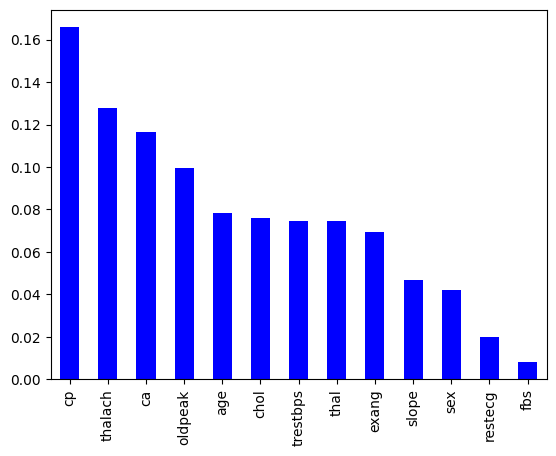

In [46]:
index= df.columns[:-1]
importance = pd.Series(rf.feature_importances_, index=index)
importance.nlargest(13).plot(kind='bar', colormap='winter')